# Flight Price Prediction Project
Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<AxesSubplot:>

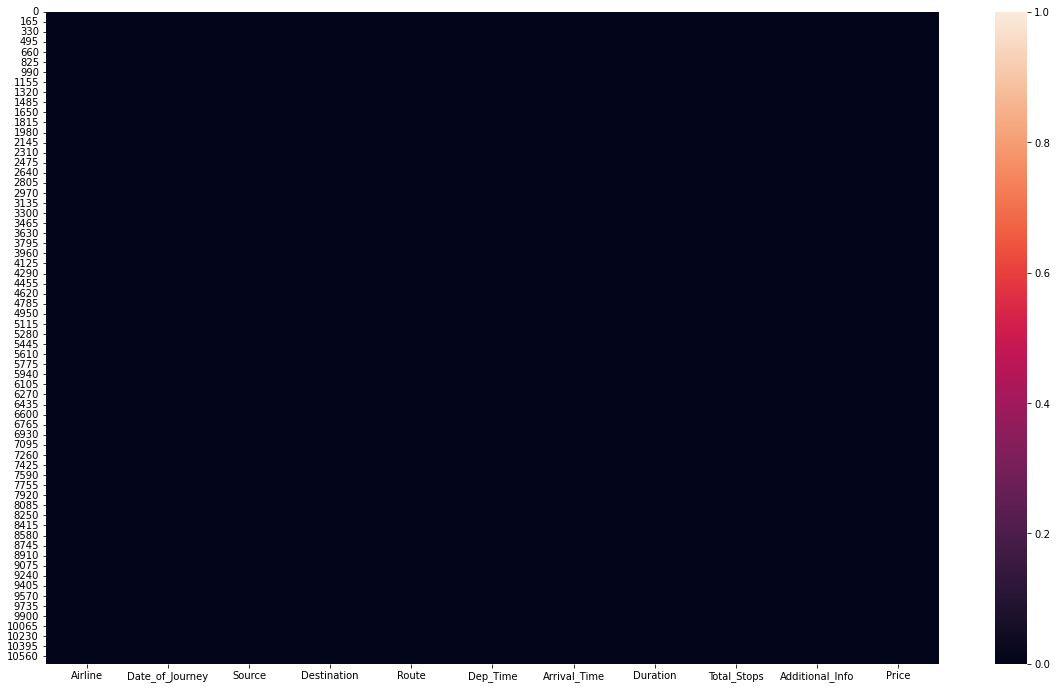

In [6]:
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

Since we have lot of flight's data, we can't see the missing values

In [7]:
#Checking Missing values of Route column
df[df["Route"].isnull()== True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
#drop the missing values
df=df.drop(9039,axis=0)

In [9]:
#check again missing values of the Route column
df[df["Route"].isnull()== True]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [10]:
#Checking Missing Values of Total_Stops column
df[df["Total_Stops"].isnull()== True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
#checking columns name of the DataFrame
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Now we divide all the columns into categorical and numerical types

In [13]:
df.dtypes.index

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [15]:
len(categorical_columns)

10

In [16]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Price']
[10]


We only have one numeric column which is our target column.others are categorical column.

# Univariate Analysis

categorical columns

column name  Airline


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
len= 12
####################################################################################################


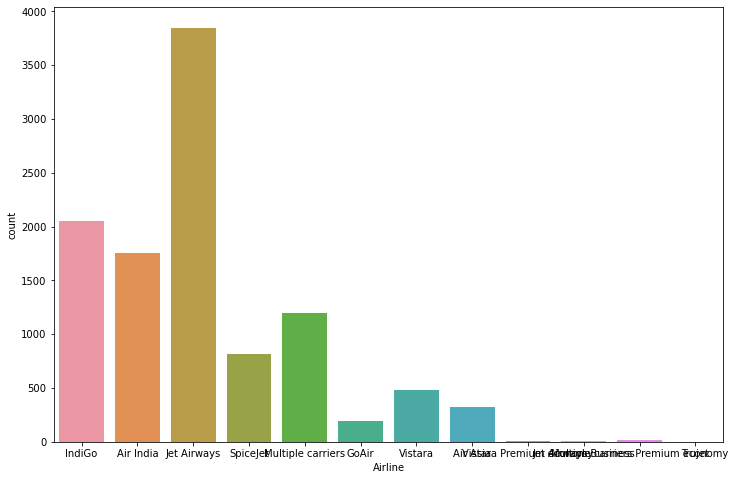

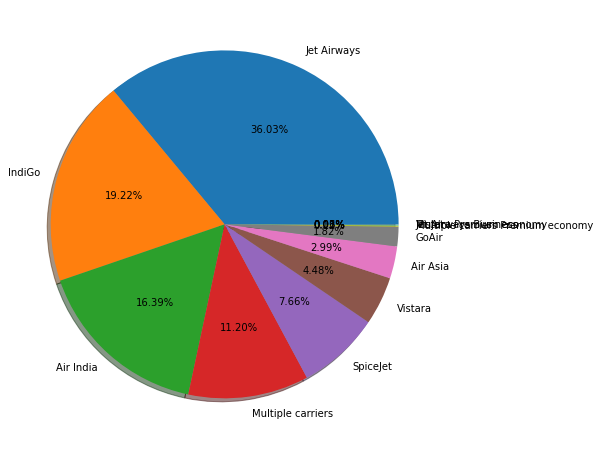

In [17]:
i = 0 #using the index no of categorical column
print("column name ",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,8))
sns.countplot(df[df.columns[i]])
print("#"*100)
plt.figure(figsize=(12,8))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index
       ,shadow=True,autopct='%1.2f%%')
plt.show()
print("\n")

we have most of the data of Jet Airways airlines and very few data of Multiple carriers Premium economy,Jet Airways Business,Vistara Premium economy,Trujetn Airlines

column Name: Date_of_Journey


18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64
len= 44
#############################################################################################################################


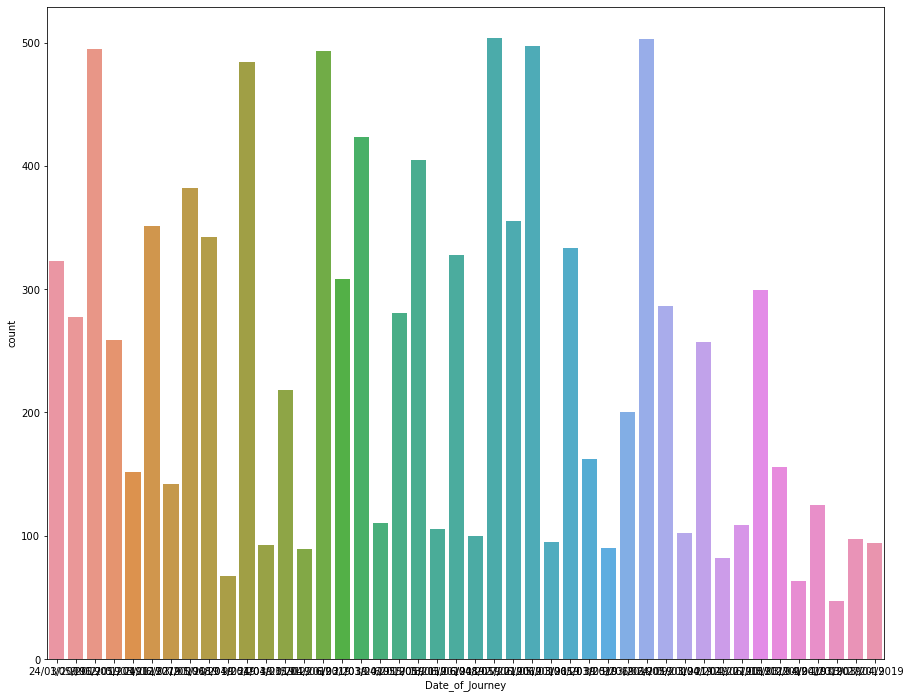

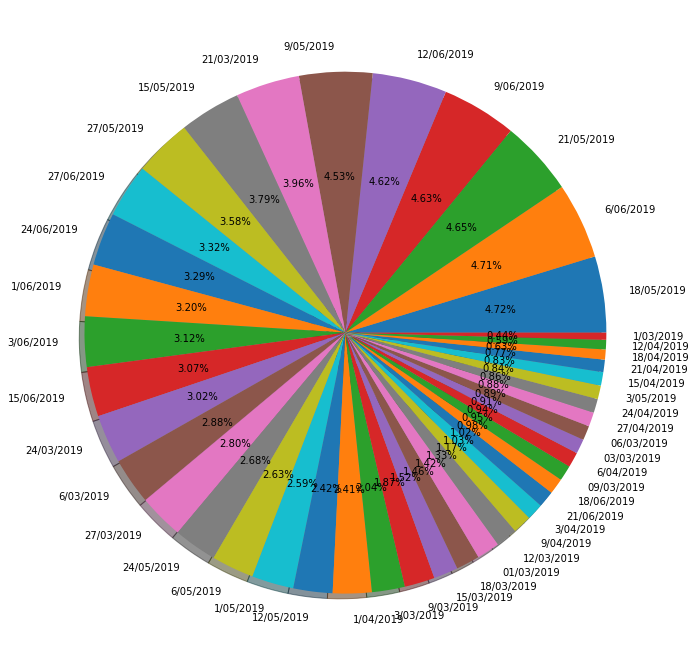

In [18]:
i=1 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(15,12))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(15,12))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

We can see that all the data of the flight is from 2019

we just take month of the data and make a column. after this, we drop the Date of Journey column from the DataFrame

In [19]:
df["Journey_Month"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [20]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3


In [21]:
df["Journey_Month"].dtype

dtype('int64')

In [22]:
#append "Date_of_Journey" column in drop_columns list
drop_columns=[]
drop_columns.append("Date_of_Journey")

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3


column Name: Source


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
len= 5
#############################################################################################################################


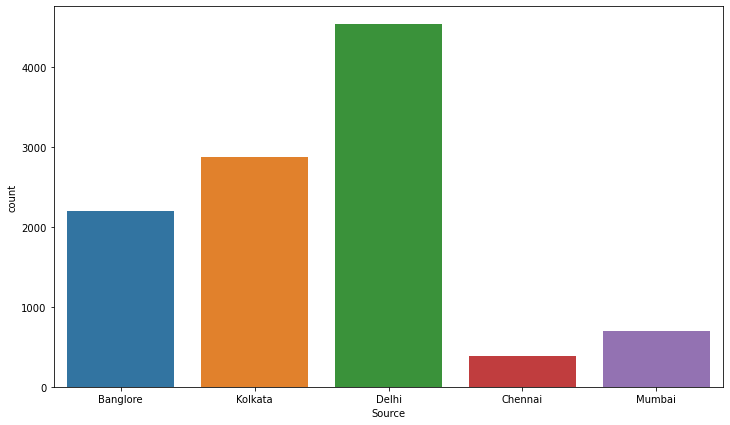

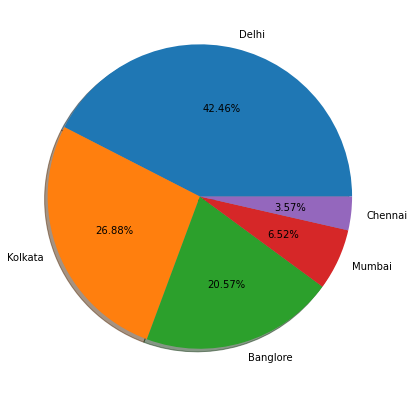

In [24]:
i=2 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

43% source is from Delhi

27% source is from Kolkata

21%sorce is from Bangalore

10% source is from Mimbai and chennai

column Name: Destination


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
len= 6
#############################################################################################################################


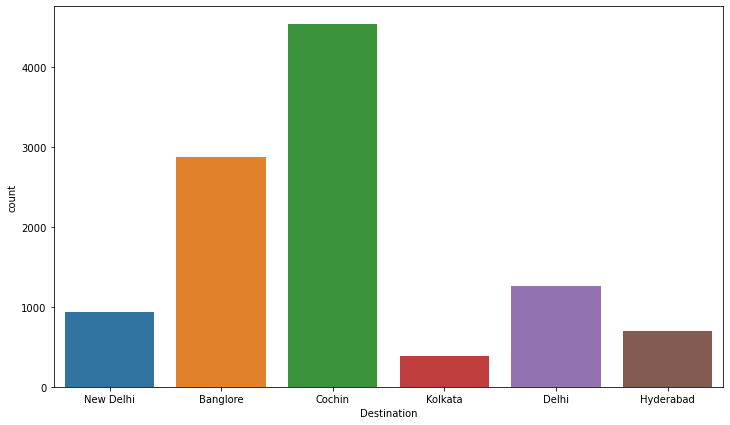

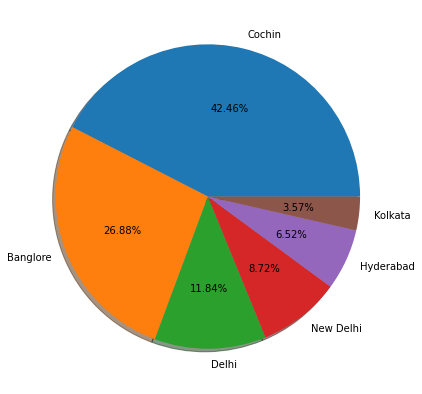

In [25]:
i=3 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

In [26]:
df.shape

(10682, 12)

column Name: Route


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


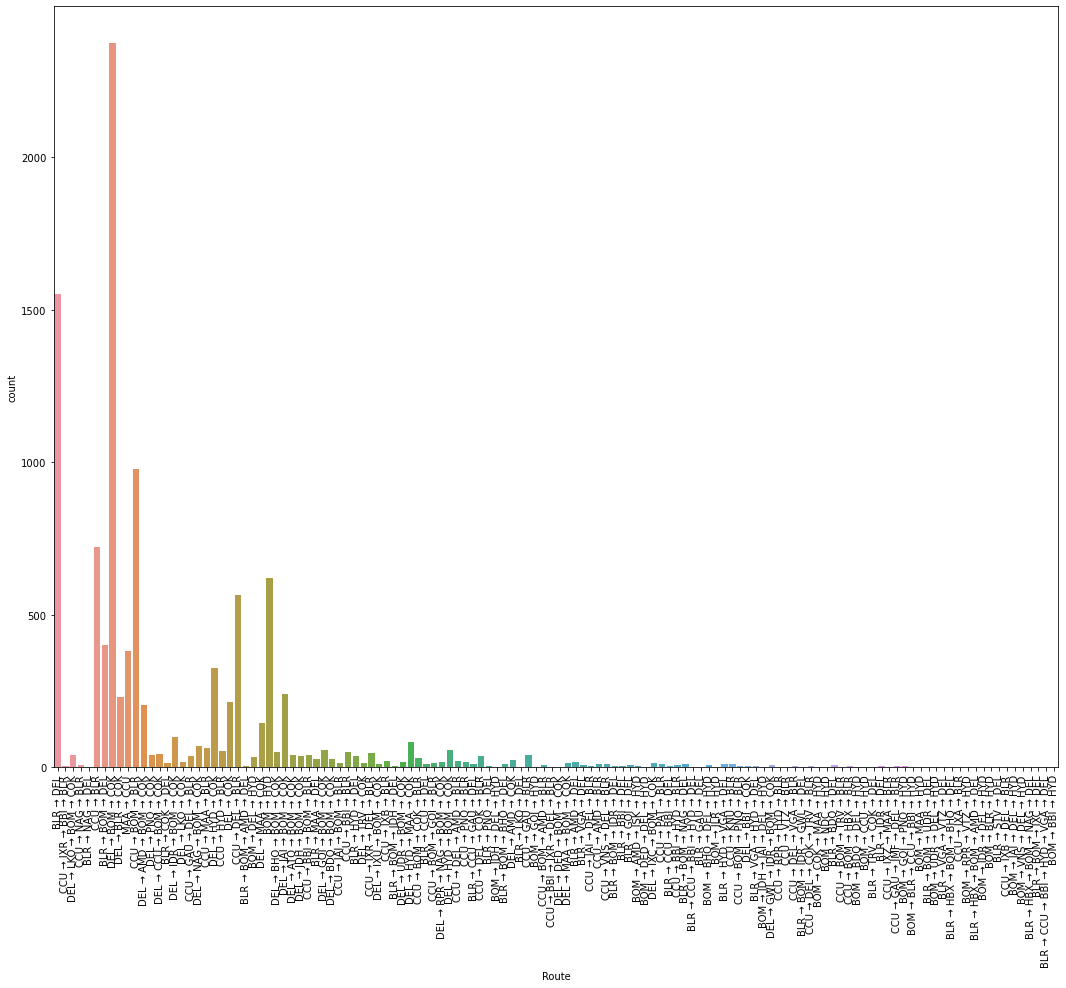



###############################################################################################################################


In [27]:
i=4 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

column_name Dep_Time


18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64


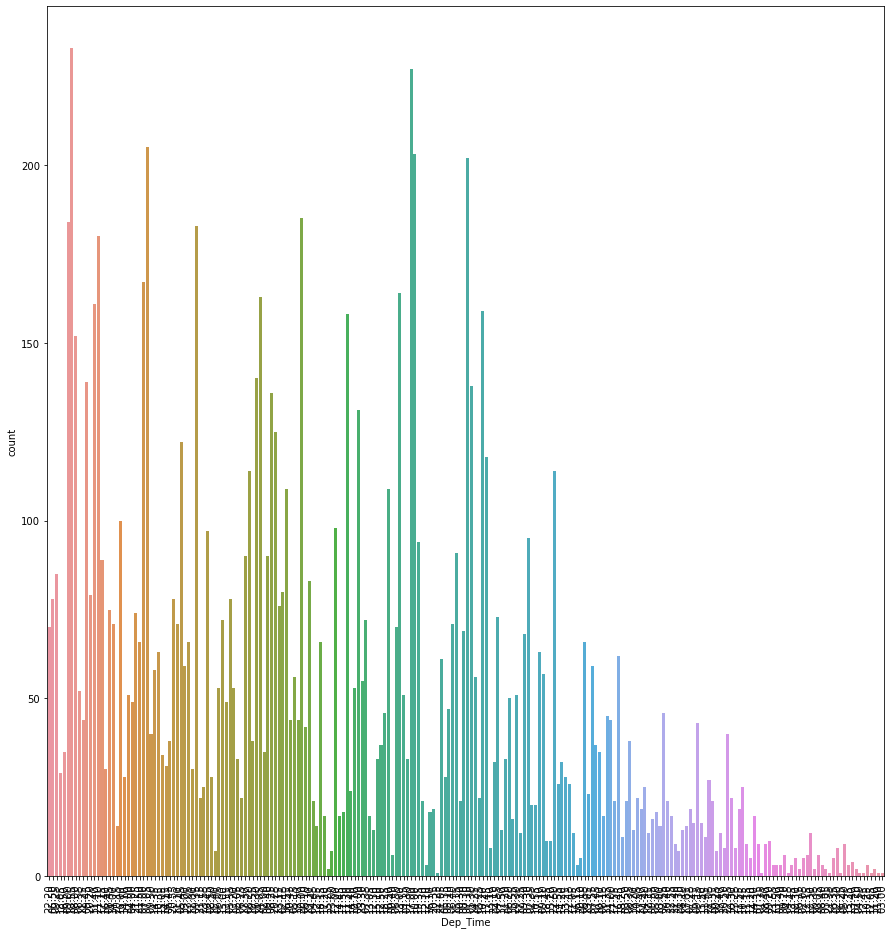



####################################################################################################


In [31]:
i=5 # using categorical columns
print('column_name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(15,16))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print('#'*100)


column_name Arrival_Time


19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64


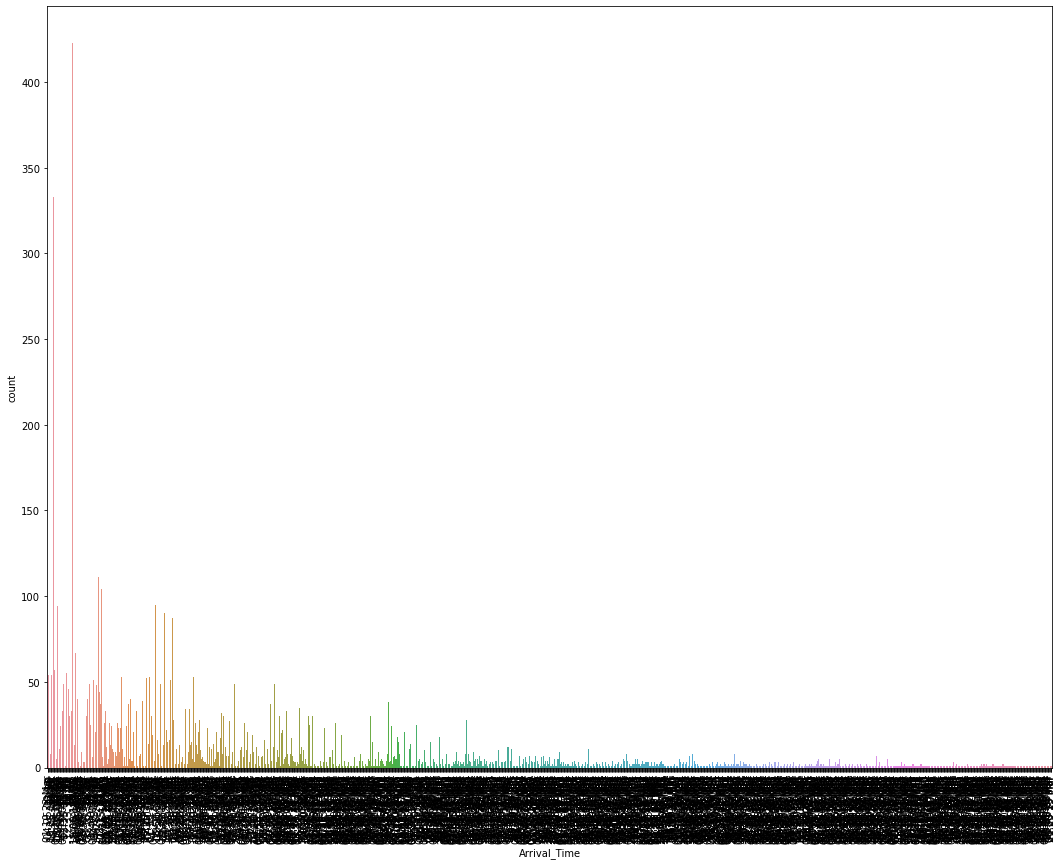



########################################################################################################################


In [33]:
i = 6     # using categorical columns
print('column_name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print('#'*120)


columns_name Duration


2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


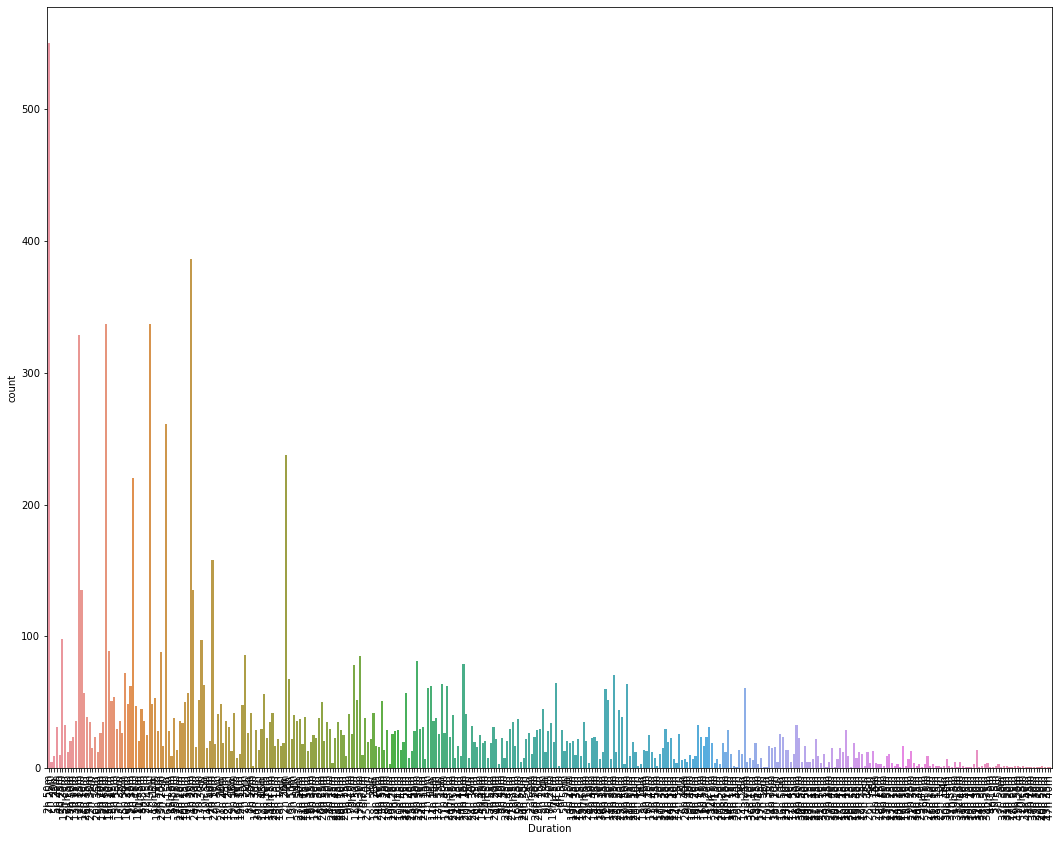



########################################################################################################################


In [34]:
i = 7
print('columns_name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print('#'*120)


Since we have Duration of every flight journey,we will drop Dep_Time and Arrival_Time columns

In [35]:
# now we are append duration column in drop column list
drop_columns.append('Dep_Time')
drop_columns.append('Arrival_Time')

Now we are converting duration inot duration mintes to analysis better

In [41]:
D = []
for i in range(9039):
    du = df['Duration'][i].replace('m','').replace(' ','').split('h')
    x=float(du[0].replace('h',''))
    if len(du)==1:
        y=0
    else:
        if type(du[1])==str:
            y=0
        else:
            y=float(du[1])
    D.append(x*60 + y)
    
for i in range(9040,10683):
    du= df['Duration'][i].replace('m','').replace(' ','').split('h')
    x=float(du[0].replace('h',''))
    if len(du)==1:
        y=0
    else:
        if type(du[1])==str:
            y=0
        else:
            y=float(du[1])
    D.append(x*60 + y)        
    

In [42]:
D

[120.0,
 420.0,
 1140.0,
 300.0,
 240.0,
 120.0,
 900.0,
 1260.0,
 1500.0,
 420.0,
 780.0,
 120.0,
 120.0,
 720.0,
 120.0,
 1560.0,
 240.0,
 1320.0,
 1380.0,
 1200.0,
 300.0,
 900.0,
 120.0,
 120.0,
 780.0,
 900.0,
 300.0,
 300.0,
 120.0,
 120.0,
 120.0,
 780.0,
 120.0,
 1320.0,
 300.0,
 600.0,
 300.0,
 120.0,
 360.0,
 660.0,
 660.0,
 480.0,
 1320.0,
 120.0,
 720.0,
 120.0,
 120.0,
 120.0,
 960.0,
 1140.0,
 180.0,
 1500.0,
 120.0,
 180.0,
 120.0,
 960.0,
 900.0,
 120.0,
 360.0,
 1500.0,
 720.0,
 1620.0,
 600.0,
 600.0,
 120.0,
 600.0,
 120.0,
 60.0,
 780.0,
 120.0,
 60.0,
 1560.0,
 420.0,
 780.0,
 300.0,
 120.0,
 120.0,
 60.0,
 1140.0,
 120.0,
 840.0,
 120.0,
 1320.0,
 540.0,
 600.0,
 1260.0,
 300.0,
 1080.0,
 720.0,
 1080.0,
 540.0,
 660.0,
 1020.0,
 780.0,
 120.0,
 120.0,
 120.0,
 180.0,
 60.0,
 960.0,
 720.0,
 720.0,
 420.0,
 1440.0,
 120.0,
 480.0,
 420.0,
 840.0,
 1800.0,
 1140.0,
 900.0,
 120.0,
 720.0,
 600.0,
 300.0,
 900.0,
 960.0,
 600.0,
 120.0,
 660.0,
 120.0,
 60.0,
 840.0

In [43]:
len(D)

10682

In [44]:
df['Duration(mins)'] = D

Now checking the Dsitribution curve of  new columns

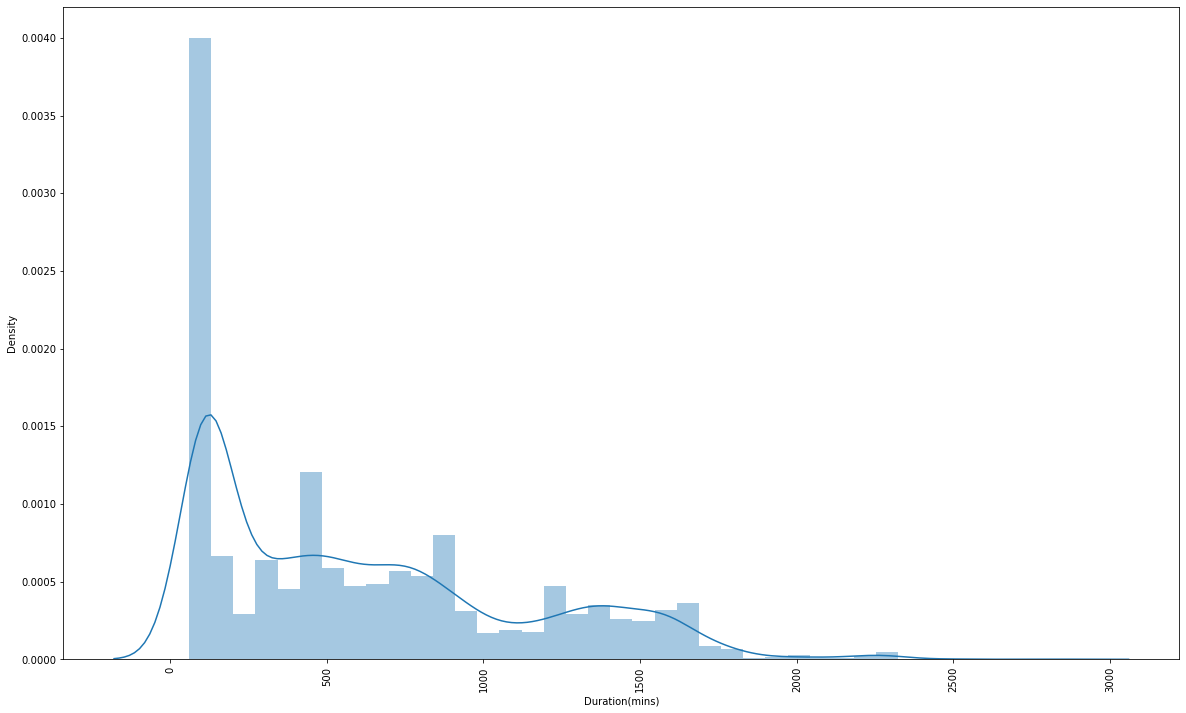



####################################################################################################


In [46]:
plt.figure(figsize=(20,12))
sns.distplot(df['Duration(mins)'])
plt.xticks(rotation=90)
plt.show()
print('\n')
print('#'*100)

we can see that posetive skewness present in the curve

now we don't need Duration column.so,we drop it.

In [47]:
#append "Duration" column in drop_columns list
drop_columns.append("Duration")

column Name: Total_Stops


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64
len= 5
#############################################################################################################################


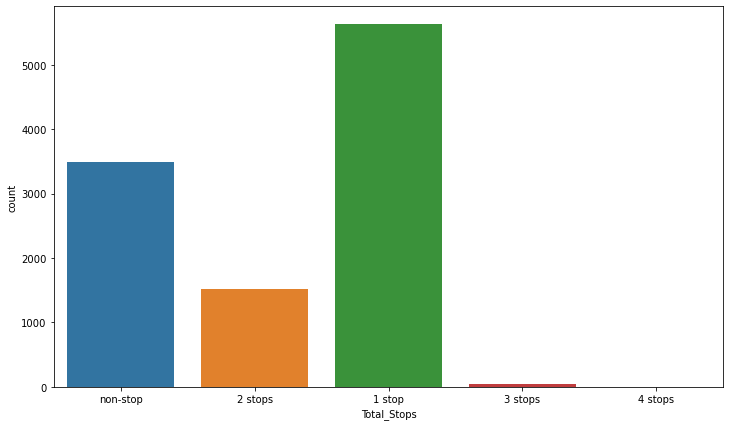

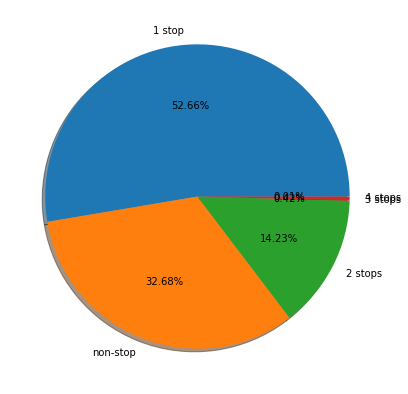

In [50]:
i=8 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

column Name: Additional_Info


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64
len= 10
#############################################################################################################################


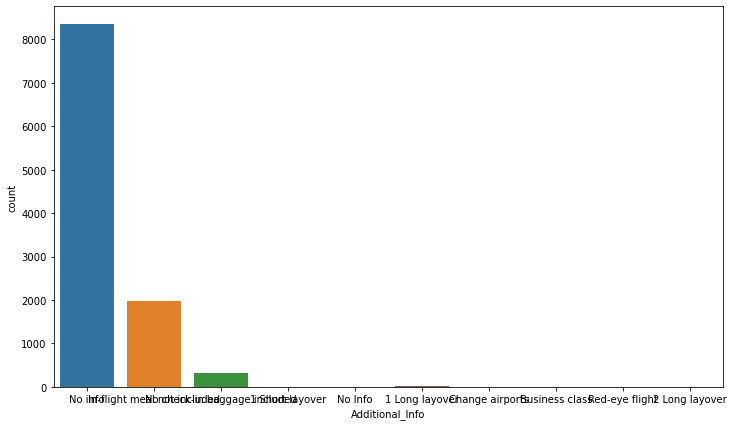

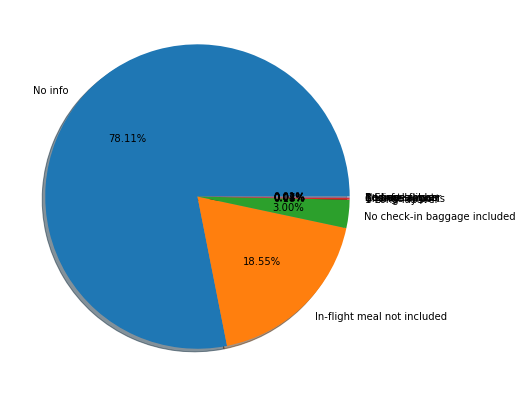

In [54]:
i=9 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
print("len=",len(df[df.columns[i]].value_counts()))
plt.figure(figsize=(12,7))
sns.countplot(df[df.columns[i]])
print("#"*125)
plt.figure(figsize=(12,7))
plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.show()
print('\n')

we can see that additional information of most flight is missing.

we can see that there are two type "no info" present in the column for some typing mistake.we have to fix it.

In [55]:
df[df['Additional_Info']=='No Info']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Duration(mins)
795,IndiGo,01/03/2019,Banglore,New Delhi,BLR → HYD → DEL,16:55,21:50,4h 55m,1 stop,No Info,8153,3,240.0
2212,IndiGo,01/03/2019,Banglore,New Delhi,BLR → HYD → DEL,16:15,20:35,4h 20m,1 stop,No Info,7917,3,240.0
9220,IndiGo,01/03/2019,Banglore,New Delhi,BLR → HYD → DEL,05:15,10:00,4h 45m,1 stop,No Info,8064,3,240.0


In [59]:
list3=[795,2212,9220]
for i in list3:
    df["Additional_Info"][i]='No info'

In [62]:
df[df['Additional_Info']=='No Info']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Duration(mins)


column Name: Additional_Info


No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


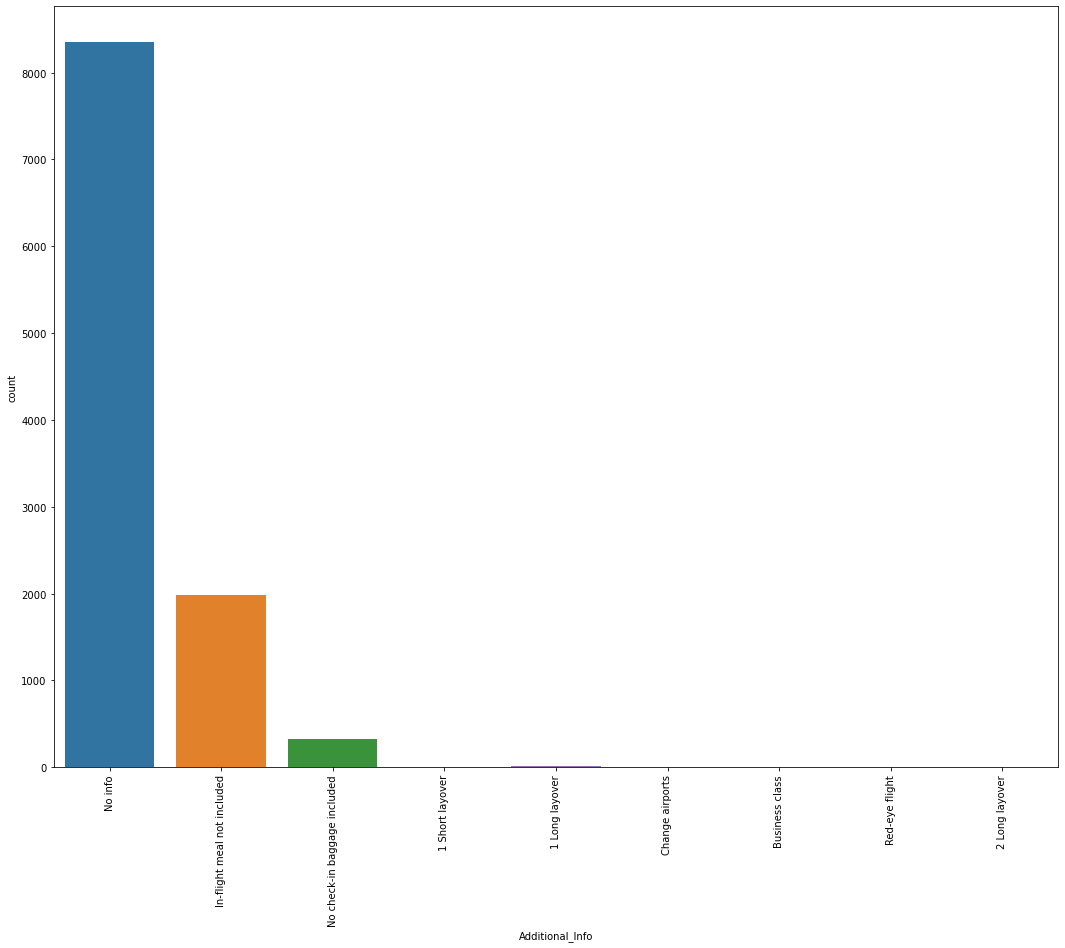



###############################################################################################################################


In [67]:
i=-4 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)


column Name: Price


10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64


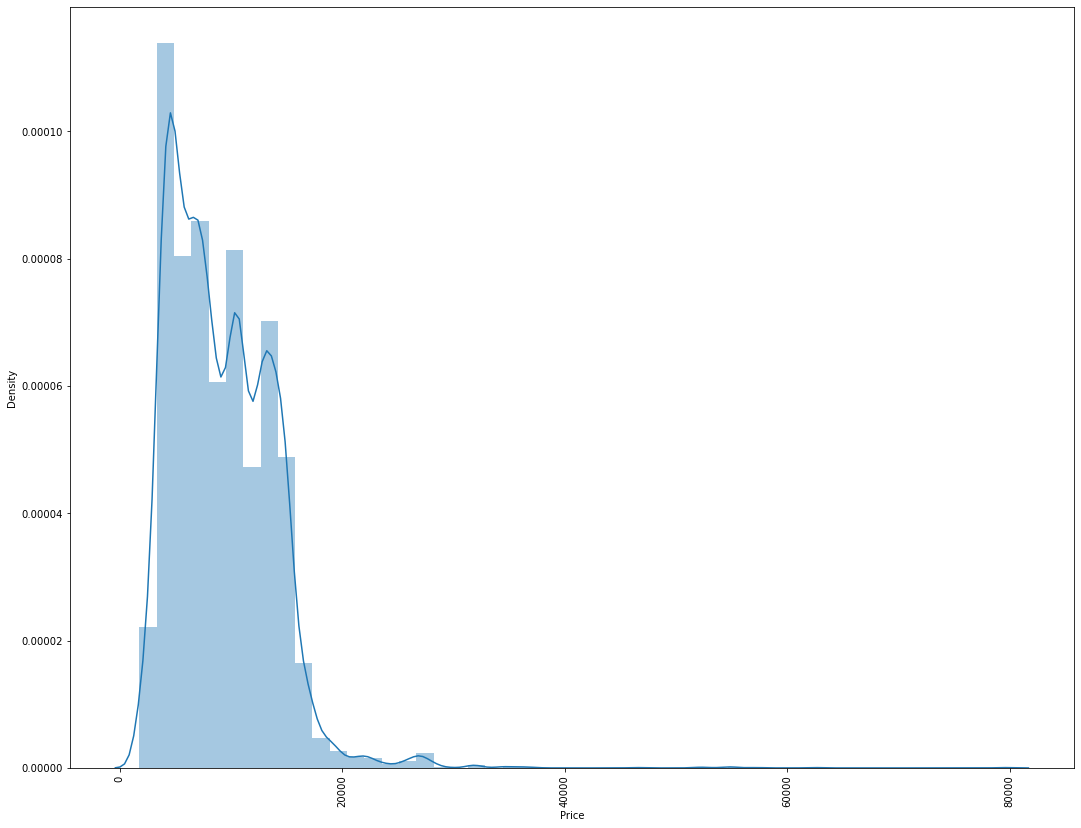



###############################################################################################################################


In [71]:
i=10 #using the index no of categorical column
print("column Name:",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(18,14))
sns.distplot(df[df.columns[i]])
plt.xticks(rotation=90)
plt.show()
print('\n')
print("#"*127)

Above plot shows the Ditribution curve of our target columns.
The curve is not like normal Distribution curve positive skewness present in the data

# Bivariate Analysis

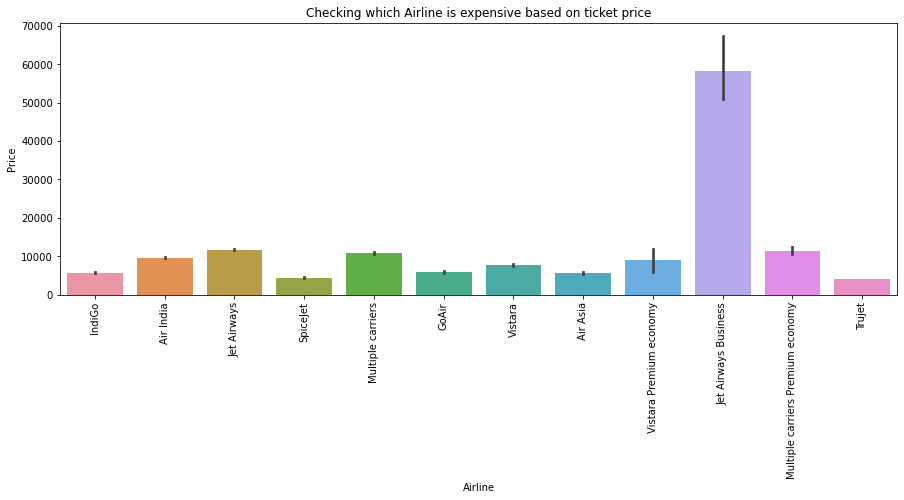

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(df["Airline"],df["Price"],data=df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.xticks(rotation=90)
plt.show()

The bar plot shows that the Jet Airways is most expensive Airline followed by Multiple carries and Air India

The Trujet and Spicejet have very cheap ticket prices compared to others.

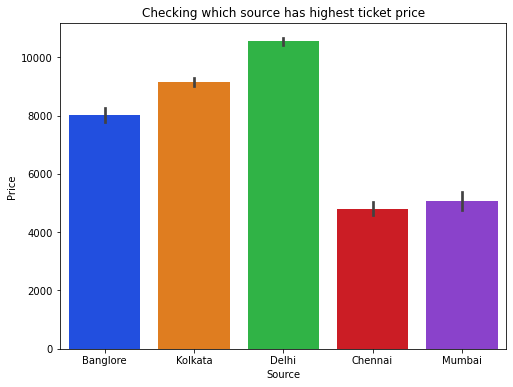

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(df["Source"],df["Price"],data=df,palette="bright")
plt.title("Checking which source has highest ticket price")
plt.show()

The tickets prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources

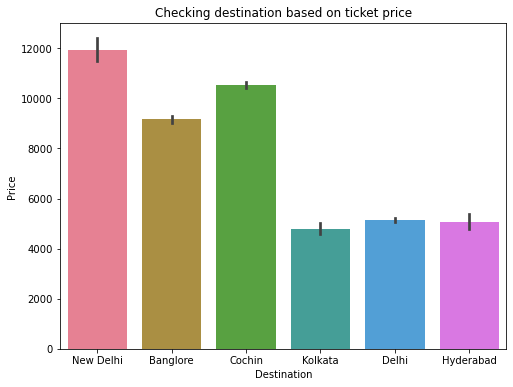

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(df["Destination"],df["Price"],data=df,palette="husl")
plt.title("Checking destination based on ticket price")
plt.show()

The ticket price is high in Delhi destination followed by Bangalore which means they have long distance from the source.

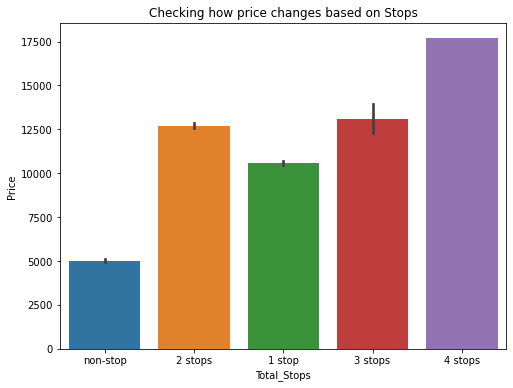

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df)
plt.title("Checking how price changes based on Stops")
plt.show()

Here the flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.


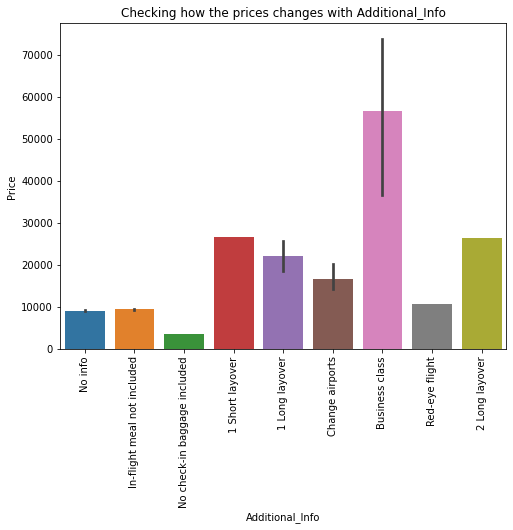

In [91]:
plt.figure(figsize=(8,6))
sns.barplot(df["Additional_Info"],df["Price"],data=df)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=90)
plt.show()

The plot shows that the Business class fights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.



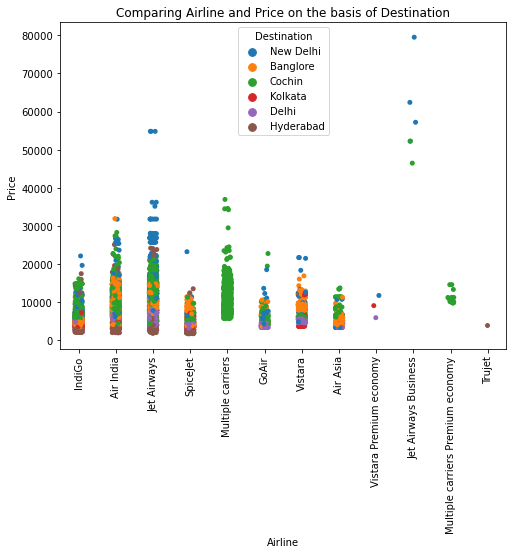

In [95]:
# checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Airline'],y=df['Price'],hue=df['Destination'])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=90)
plt.show()

Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others


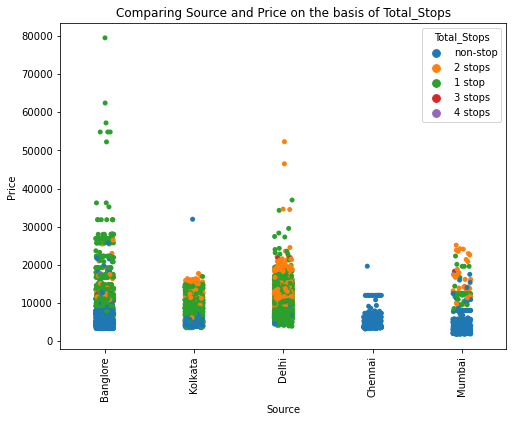

In [100]:
# checking how the price pays role in Source on the basis of Total_Stops
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Source'],y=df['Price'],hue=df['Total_Stops'])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=90)
plt.show()

As we can notice that the flights in the Banglore source which have only one stop between source and destination have very expensive ticket price and the flights in Chennai with no stops have very cheap prices compared to other source flights.


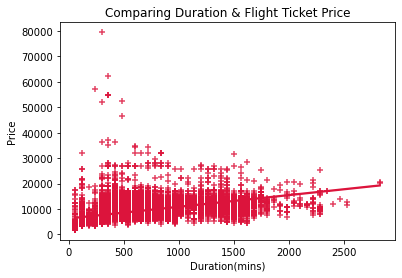

In [108]:
plt.title("Comparing Duration & Flight Ticket Price")
sns.regplot(x= df['Duration(mins)'],y= df['Price'],marker="+",color='crimson')
plt.show()

 From the reg plot we can observe some positive linear relation between Duration and Price.

# Multivariate Analysis

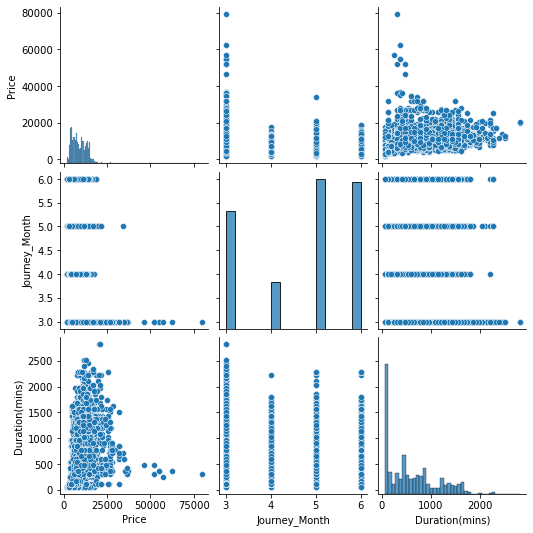

In [111]:
sns.pairplot(df,palette="gnuplot2")
plt.show()



we have only three numerical columns.
We can see that there is no pair as closely related to each other.

In [112]:
#now we drop that column which i stored in drop_columns list

In [115]:
df=df.drop(drop_columns,axis=1)

In [116]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,120.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,420.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,300.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,240.0
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,120.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,120.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,180.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,120.0


In [117]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.548810,1759.0,5277.0,8372.0,12373.0,79512.0
Journey_Month,10682.0,4.708575,1.164408,3.0,3.0,5.0,6.0,6.0
Duration(mins),10682.0,614.721962,509.669337,60.0,120.0,480.0,900.0,2820.0


we have only two numerical columns

-Price

-Duration(minute)

journey month is not numerical column

# Checking correlations

In [120]:
df.corr()

,Price,Journey_Month,Duration(mins)
Price,1.000000,-0.103643,0.508902
Journey_Month,-0.103643,1.000000,0.016061
Duration(mins),0.508902,0.016061,1.000000


correlation between price and duration(mins) is 0.51.It is consider as a good correlation.

journey_month is a categorical type column but in data, it is used as a numerical column.

Since we have only one numerical column besides the target column,we will not check VIF score.

# Checking outliers

In [122]:
list_o=['Price','Duration(mins)']

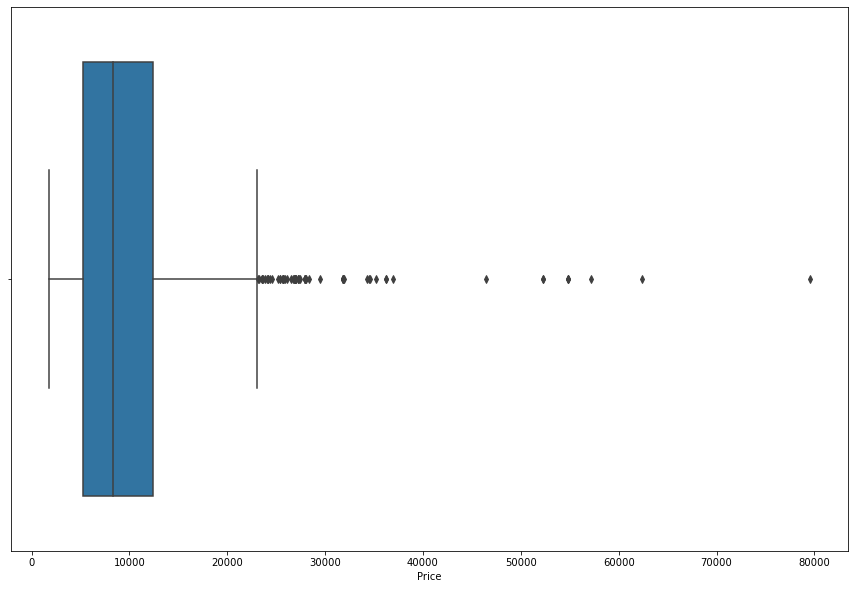

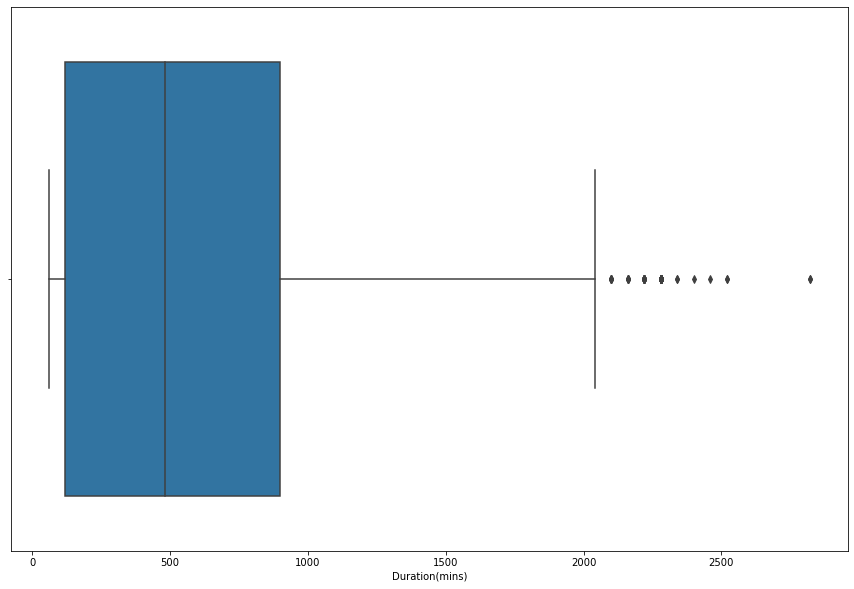

In [124]:
for i in list_o:
    plt.figure(figsize=(15,10))
    sns.boxplot(df[i])
    plt.show()

we can see that there are lot of outliers in our target column and few outliers are present in Duratuion(mins) column

# Remove Outliers using zscore

In [125]:
from scipy.stats import zscore
import numpy as np

In [129]:
outliers_columns=df[['Price','Duration(mins)']]

In [132]:
z=np.abs(zscore(outliers_columns))
z


,Price,Duration(mins)
0,1.125535,0.970718
1,0.309068,0.382073
2,1.039783,1.030673
3,0.622209,0.617531
4,0.914006,0.735260
...,...,...
10678,1.079995,0.970718
10679,1.071754,0.970718
10680,0.402967,0.852989
10681,0.772181,0.970718


In [133]:
threshold=3
print(np.where(z>3))

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   826,   936,   946,   959,   966,   969,   975,  1067,
        1113,  1196,  1246,  1341,  1346,  1424,  1442,  1466,  1478,
        1496,  1551,  1629,  1654,  1657,  1785,  1791,  1804,  1918,
        2055,  2099,  2108,  2172,  2495,  2553,  2556,  2618,  2635,
        2641,  2654,  2693,  2718,  2924,  3032,  3111,  3257,  3400,
        3457,  3535,  3700,  3790,  3815,  3966,  4012,  4047,  4118,
        4463,  4521,  4655,  4676,  4829,  5013,  5136,  5372,  5439,
        5516,  5662,  5701,  5701,  5710,  5711,  5719,  5738,  5745,
        5782,  5856,  5933,  5953,  5986,  6059,  6085,  6314,  6321,
        6407,  6476,  6576,  6588,  6605,  6884,  6991,  7189,  7232,
        7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,  7611,
        7612,  7617,  7713,  7724,  7756,  7876,  7902,  7906,  8020,
        8080,  8127,  8153,  8360,  8409,  8412,  8451,  8470,  8536,
        8598,  8601

In [135]:
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Duration(mins)
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,120.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,420.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,1140.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,300.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,240.0
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,120.0
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,120.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,180.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,3,120.0


In [137]:
list_ro=['Price','Duration(mins)']

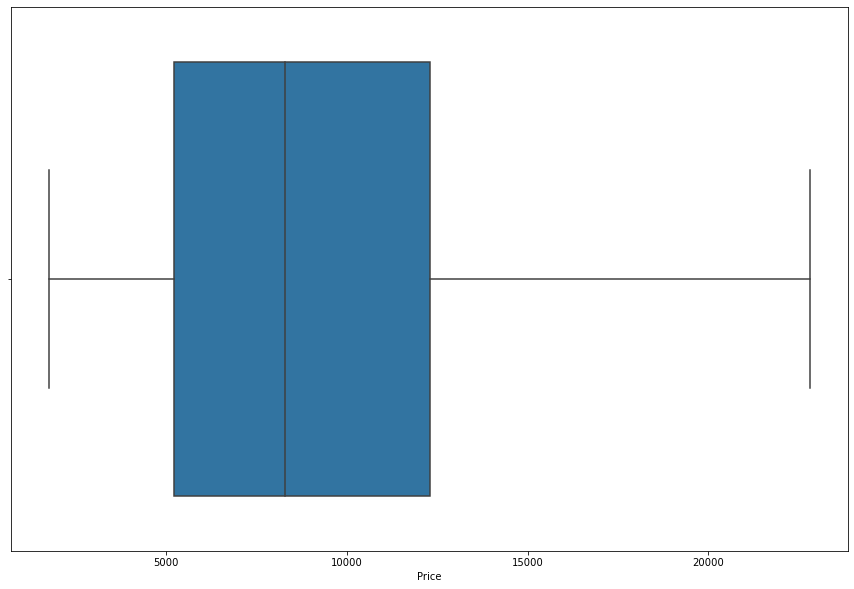

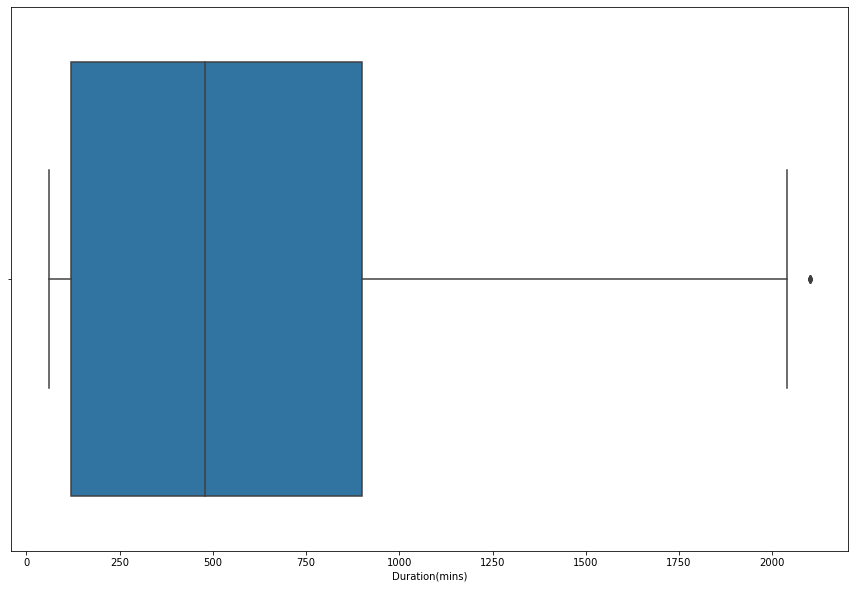

In [139]:
for i in list_ro:
    plt.figure(figsize=(15,10))
    sns.boxplot(df_new[i])
    plt.show()

we can see that all outliers was removed.

In [141]:
print(df.shape)
print(df_new.shape)

(10682, 9)
(10521, 9)


In [143]:
percentage_of_dataloss=((10682-10521)/10682)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 1.507208387942333


# LabelEncoding

In [145]:

df.nunique().to_frame('unique values')

,unique values
Airline,12
Source,5
Destination,6
Route,128
Total_Stops,5
Additional_Info,9
Price,1870
Journey_Month,4
Duration(mins),43


In [146]:
list=["Airline","Source","Destination","Route","Total_Stops","Additional_Info"]

In [147]:
from sklearn.preprocessing import LabelEncoder

In [149]:
le=LabelEncoder()
for i in list:
    df_new[i]=le.fit_transform(df_new[i]).astype(float)

In [150]:
df_new

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Duration(mins)
0,3.0,0.0,5.0,18.0,4.0,4.0,3897,3,120.0
1,1.0,3.0,0.0,81.0,1.0,4.0,7662,5,420.0
2,4.0,2.0,1.0,115.0,1.0,4.0,13882,6,1140.0
3,3.0,3.0,0.0,88.0,0.0,4.0,6218,5,300.0
4,3.0,0.0,5.0,29.0,0.0,4.0,13302,3,240.0
...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,61.0,4.0,4.0,4107,4,120.0
10679,1.0,3.0,0.0,61.0,4.0,4.0,4145,4,120.0
10680,4.0,0.0,2.0,18.0,4.0,4.0,7229,4,180.0
10681,9.0,0.0,5.0,18.0,4.0,4.0,12648,3,120.0


# Dividing data in features and label

In [151]:
x=df_new.drop("Price",axis=1) #Independent variable
y=df_new.iloc[:,-3] #Dependent variable

In [152]:
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Month,Duration(mins)
0,3.0,0.0,5.0,18.0,4.0,4.0,3,120.0
1,1.0,3.0,0.0,81.0,1.0,4.0,5,420.0
2,4.0,2.0,1.0,115.0,1.0,4.0,6,1140.0
3,3.0,3.0,0.0,88.0,0.0,4.0,5,300.0
4,3.0,0.0,5.0,29.0,0.0,4.0,3,240.0
...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,61.0,4.0,4.0,4,120.0
10679,1.0,3.0,0.0,61.0,4.0,4.0,4,120.0
10680,4.0,0.0,2.0,18.0,4.0,4.0,4,180.0
10681,9.0,0.0,5.0,18.0,4.0,4.0,3,120.0


In [153]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10521, dtype: int64

# Transforming Data to Remove skewness

In [154]:
from sklearn.preprocessing import power_transform

In [155]:
x=power_transform(x,method='yeo-johnson')
x

array([[-0.28611101, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864,  0.89537399, -1.36353513, ...,  0.52623968,
         0.13586008, -0.02102269],
       [ 0.21005636, -0.02576902,  0.0196569 , ...,  0.52623968,
         1.17140118,  1.08726559],
       ...,
       [ 0.21005636, -1.61080416,  0.72381217, ...,  0.52623968,
        -0.72732001, -0.81945586],
       [ 2.26488269, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864, -0.02576902,  0.0196569 , ...,  0.52623968,
         0.13586008,  0.11612782]])

printing skewness after power transform

In [156]:

df_new1=pd.DataFrame(x)
df_new1.skew()

0   -0.007972
1   -0.236920
2    0.041469
3   -0.414241
4    0.323620
5   -1.254714
6   -0.223389
7   -0.076713
dtype: float64

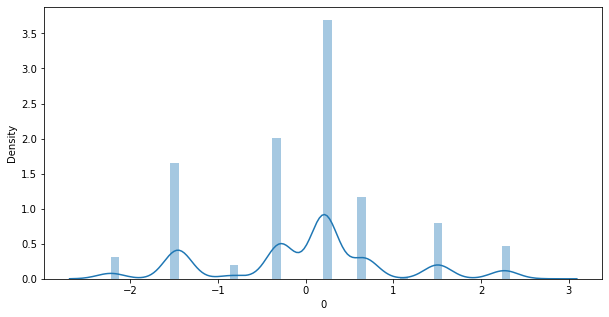

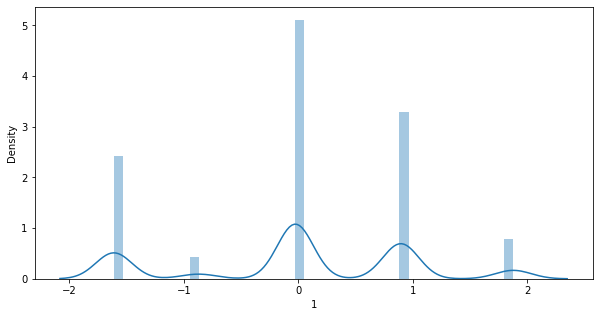

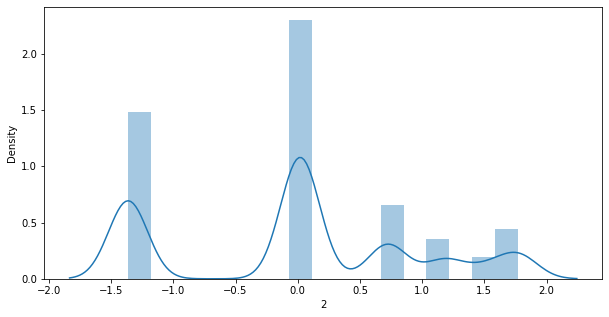

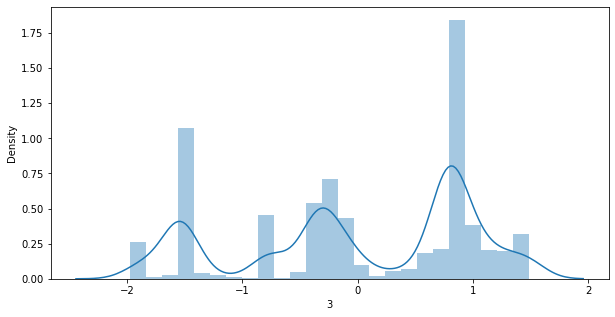

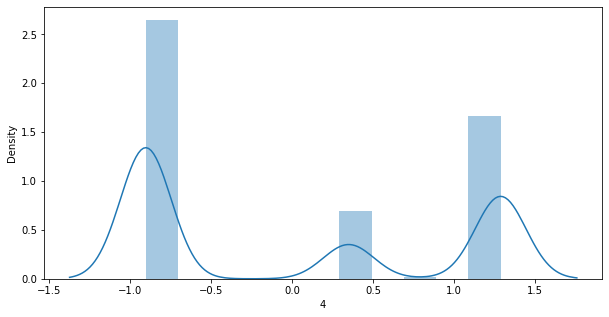

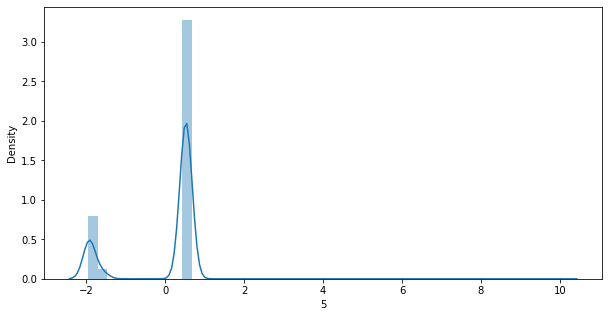

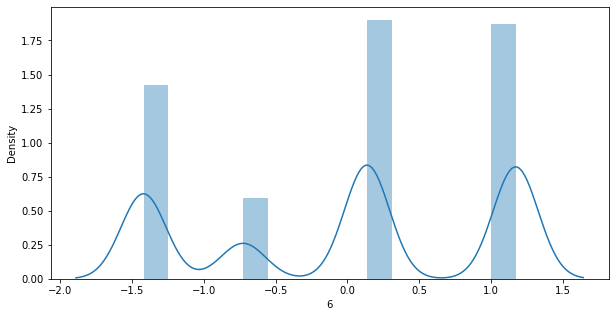

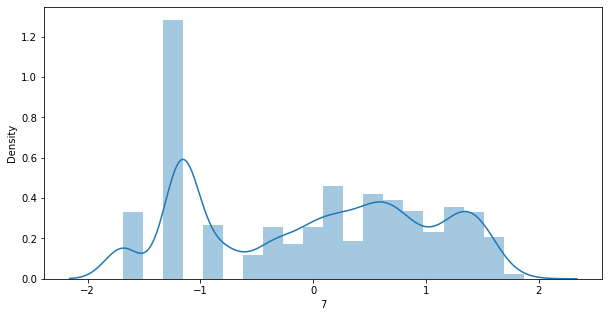

In [160]:
for i in range(8):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])
    plt.show()

skewness is removed now

# Standard Scalar 

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.28611101, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864,  0.89537399, -1.36353513, ...,  0.52623968,
         0.13586008, -0.02102269],
       [ 0.21005636, -0.02576902,  0.0196569 , ...,  0.52623968,
         1.17140118,  1.08726559],
       ...,
       [ 0.21005636, -1.61080416,  0.72381217, ...,  0.52623968,
        -0.72732001, -0.81945586],
       [ 2.26488269, -1.61080416,  1.77316412, ...,  0.52623968,
        -1.42095963, -1.16075129],
       [-1.45779864, -0.02576902,  0.0196569 , ...,  0.52623968,
         0.13586008,  0.11612782]])

Now our Data is Ready for Model Building

# Model Building

In [164]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [165]:
x.shape

(10521, 8)

In [166]:
lm=LinearRegression()
m=0
for i in range (0,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.501277229830437 at random state= 475


we find the best random state  at 475 .

In [167]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=475)

cheking shape of all variable

In [169]:
print("train_x shape =",train_x.shape)
print("test_x shape =",test_x.shape)
print("train_y shape =",train_y.shape)
print("test_y shape =",test_y.shape)

train_x shape = (7890, 8)
test_x shape = (2631, 8)
train_y shape = (7890,)
test_y shape = (2631,)


In [171]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.49777175221758363

In [172]:
lm.coef_

array([ 357.17124618,   76.83307564,  281.68671614, -129.52132224,
       -483.3367961 ,  541.02163528, -182.62923259, 2674.19343292])

In [173]:
lm.intercept_

8870.677057560082

# Error of Llinear regression Model on our dataset

In [177]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  2329.0019162434082
Mean Squared Error:  9090077.084440311
Root Mean Squared Error:  3014.9754699566483


Checking r2 score

In [180]:
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.4541115981764713


Cross validation of the Model

In [183]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.485394339484302


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [188]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

In [190]:
 model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]


In [194]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 0.49777175221758363


##################################################
accuracy score of Ridge() is = 0.49777173647294426


##################################################
accuracy score of Lasso() is = 0.49777083456480187


##################################################
accuracy score of DecisionTreeRegressor() is = 0.8680309694893218


##################################################
accuracy score of SVR() is = 0.09808252744401058


##################################################
accuracy score of KNeighborsRegressor() is = 0.8233629118694278


##################################################
accuracy score of RandomForestRegressor() is = 0.8644707445626099


##################################################
accuracy score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False

# Decision Tree, Randonforest , BaggingRregressor we got good result

# Checking Cross Val Score

In [195]:
from sklearn.model_selection import cross_val_score

In [197]:
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LinearRegression() is = 0.4848626080034891
cross validation score of Ridge() is = 0.484862781069484
cross validation score of Lasso() is = 0.48486138548891705
cross validation score of DecisionTreeRegressor() is = 0.7579852165790038
cross validation score of SVR() is = 0.06177403280029775
cross validation score of KNeighborsRegressor() is = 0.7684122666794615
cross validation score of RandomForestRegressor() is = 0.7896854235684456
cross validation score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
      

we get best cross val score from RandomForestRegressor for cv=3

# Parameter Tuning

creating parameter list to pass in GreadSearchCV

In [199]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':["squared_error", "absolute_error", "poisson"]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=3,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto'}

In [200]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=4, max_features='auto')

In [202]:
gcvpred1=gcv1.best_estimator_.predict(test_x)
gcv1.best_estimator_.score(train_x,train_y)

0.7171605621546365

# Creating Final Model

In [203]:
final_model=RandomForestRegressor(max_depth=4)

In [206]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y)) 

Test Accuracy= 0.7088766893105612


In [209]:
final_model.fit(train_x,train_y)
pred1=final_model.predict(train_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 0.7173238145999388


In [212]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=final_model.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  1621.998299591274
Mean Squared Error:  5233000.970124424
Root Mean Squared Error:  2287.575347420151


,Predicted,Original
409,10120.550448,8266
2533,12048.095036,13538
1957,10120.550448,12853
1350,10509.728130,12898
2540,10422.152640,9663
...,...,...
9084,4669.378589,4423
513,14507.000761,14388
2911,11857.200611,12744
909,4645.026701,4174


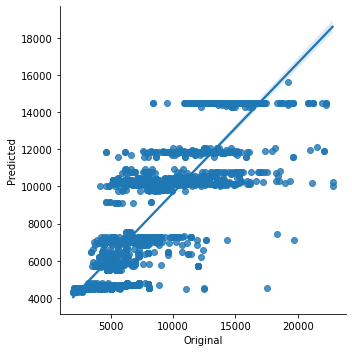

In [213]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':pred},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf

# Model Saving

In [214]:
import joblib                                                                                                     
joblib.dump(final_model,'Flight Price Prediction Model.pkl')

['Flight Price Prediction Model.pkl']

# Thankyou for watching my project